# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.194986, W: 0.332936, b: 0.222414
step: 100, loss: 0.186112, W: 0.323632, b: 0.288374
step: 150, loss: 0.179152, W: 0.315393, b: 0.346785
step: 200, loss: 0.173694, W: 0.308097, b: 0.398512
step: 250, loss: 0.169414, W: 0.301636, b: 0.444319
step: 300, loss: 0.166057, W: 0.295914, b: 0.484885
step: 350, loss: 0.163425, W: 0.290847, b: 0.520808
step: 400, loss: 0.161360, W: 0.286359, b: 0.552621
step: 450, loss: 0.159742, W: 0.282386, b: 0.580793
step: 500, loss: 0.158472, W: 0.278867, b: 0.605741
step: 550, loss: 0.157476, W: 0.275750, b: 0.627834
step: 600, loss: 0.156695, W: 0.272991, b: 0.647399
step: 650, loss: 0.156083, W: 0.270547, b: 0.664725
step: 700, loss: 0.155603, W: 0.268383, b: 0.680068
step: 750, loss: 0.155226, W: 0.266466, b: 0.693655
step: 800, loss: 0.154931, W: 0.264769, b: 0.705688
step: 850, loss: 0.154699, W: 0.263266, b: 0.716343
step: 900, loss: 0.154518, W: 0.261935, b: 0.725779
step: 950, loss: 0.154375, W: 0.260756, b: 0.734136
step: 1000, l

In [9]:
import matplotlib.pyplot as plt

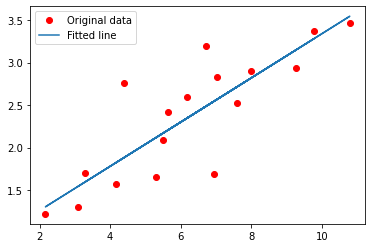

In [10]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()